In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict
import time
import seaborn as sns
import pandas as pd

In [2]:
wine_np = np.loadtxt("winequality-white.csv", dtype=np.float32, delimiter=";", skiprows=1)
wine_t = torch.tensor(wine_np, dtype=torch.float)

#Divide the data into the target value and the feature values
wine_quality = wine_t[:, -1]
wine_features = wine_t[:, :-1]

print(wine_features)

n_samples = wine_features.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

wine_features_train = wine_features.index_select(0, train_indices)
wine_quality_train = wine_quality.index_select(0, train_indices).unsqueeze(1)

wine_features_val = wine_features.index_select(0, val_indices)
wine_quality_val = wine_quality.index_select(0, val_indices).unsqueeze(1)

wine_features_train_norm = 0.1 * wine_features_train
wine_features_val_norm = 0.1 * wine_features_val

print("wine_features_train:", wine_features_train)

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]])
wine_features_train: tensor([[ 7.9000,  0.4400,  0.2600,  ...,  3.1700,  0.5200, 12.7000],
        [ 7.9000,  0.1700,  0.3200,  ...,  3.2900,  0.7600,  9.6000],
        [ 7.2000,  0.1900,  0.4600,  ...,  3.1900,  0.6000, 11.2000],
        ...,
        [ 7.9000,  0.3300,  0.2800,  ...,  3.1500,  0.3800,  8.8000],
        [ 7.3000,  0.1900,  0.2700,  ...,  3.3800,  0.5400, 11.0000],
        [ 7.0000,  0.2000,  0.3500,  ...,  3.1300,  0.4900, 11.0000]])


In [3]:
def training_loop(n_epochs, optimizer, model, loss_fn, wine_features_train, wine_features_val, wine_quality_train, wine_quality_val):
    for epoch in range(1, n_epochs + 1):
        wine_train = model(wine_features_train)  # Forward pass on training data
        loss_train = loss_fn(wine_train, wine_quality_train)

        wine_val = model(wine_features_val)  # Forward pass on validation data
        loss_val = loss_fn(wine_val, wine_quality_val)

        optimizer.zero_grad()
        loss_train.backward()  # Backward pass and gradient computation
        optimizer.step()

        if epoch <= 3 or epoch == 1000 or epoch % 5000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}, Validation loss {loss_val.item():.4f}")

In [4]:
seq_model = nn.Sequential(
    nn.Linear(11, 50),
    nn.Tanh(),
    nn.Linear(50, 1)
)
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)


In [5]:
time_start = time.time()

training_loop(
    n_epochs=30000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    wine_features_train=wine_features_train_norm,
    wine_features_val=wine_features_val_norm,
    wine_quality_train=wine_quality_train,
    wine_quality_val=wine_quality_val
)

time_end = time.time()

Epoch 1, Training loss 37.0896, Validation loss 36.8803
Epoch 2, Training loss 30.0413, Validation loss 29.8786
Epoch 3, Training loss 24.3801, Validation loss 24.2551
Epoch 1000, Training loss 0.7699, Validation loss 0.7699
Epoch 5000, Training loss 0.6929, Validation loss 0.6836
Epoch 10000, Training loss 0.6585, Validation loss 0.6507
Epoch 15000, Training loss 0.6257, Validation loss 0.6209
Epoch 20000, Training loss 0.6051, Validation loss 0.6006
Epoch 25000, Training loss 0.5909, Validation loss 0.5877
Epoch 30000, Training loss 0.5813, Validation loss 0.5796


In [6]:

time_duration = time_end - time_start
minutes = int(time_duration / 60)
seconds = int(time_duration % 60)

print(f"It took {minutes}m and {seconds}s to train the network")

It took 3m and 0s to train the network


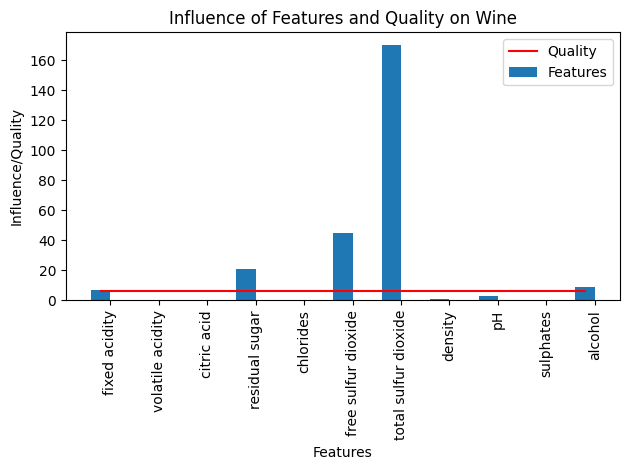

In [30]:
import numpy as np
import matplotlib.pyplot as plt

wine_feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                      'density', 'pH', 'sulphates', 'alcohol']

example = 0
wine_features_np = wine_features[example].numpy()
wine_quality_np = [wine_quality[example].numpy()] * len(wine_features_np)

indices = np.arange(len(wine_feature_names))
bar_width = 0.4

fig, ax = plt.subplots()
ax.bar(indices, wine_features_np, bar_width, label='Features')
ax.plot(indices, wine_quality_np, 'r-', label='Quality')

ax.set_xlabel('Features')
ax.set_ylabel('Influence/Quality')
ax.set_title('Influence of Features and Quality on Wine')
plt.xticks(indices + bar_width / 2, wine_feature_names, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()

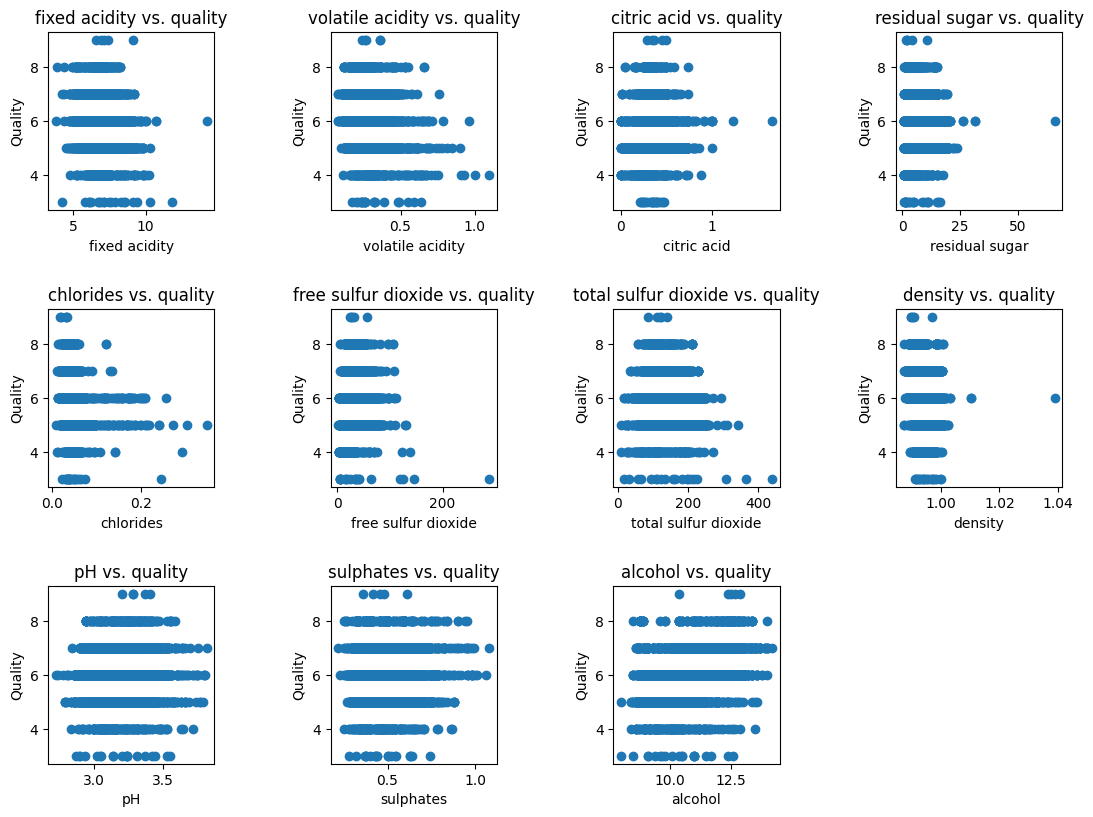

In [21]:
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
fig.tight_layout(pad=5.0)

for i, ax in enumerate(axs.flatten()):
    if i < len(wine_features[0]):
        ax.scatter(wine_features[:, i], wine_quality)
        ax.set_xlabel(wine_feature_names[i])
        ax.set_ylabel('Quality')
        ax.set_title(wine_feature_names[i] + ' vs. quality')

if len(wine_features[0]) < 12:
    for i in range(len(wine_features[0]), 12):
        axs.flatten()[i].axis('off')

plt.show()

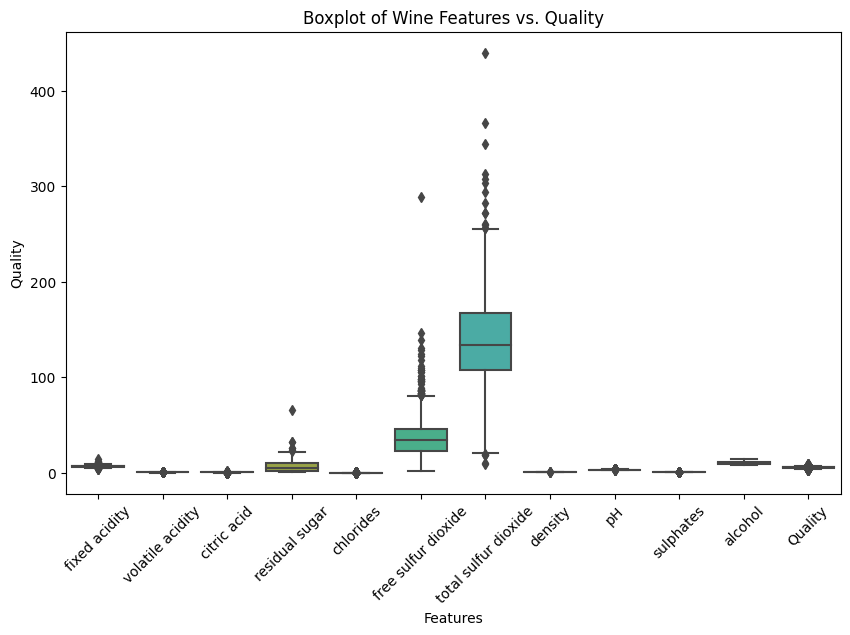

In [29]:
df = pd.DataFrame(wine_features, columns=[wine_feature_names[i] for i in range(11)])
df['Quality'] = wine_quality.flatten()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, ax=ax)
plt.xticks(rotation=45)
ax.set_xlabel('Features')
ax.set_ylabel('Quality')
ax.set_title('Boxplot of Wine Features vs. Quality')

plt.show()

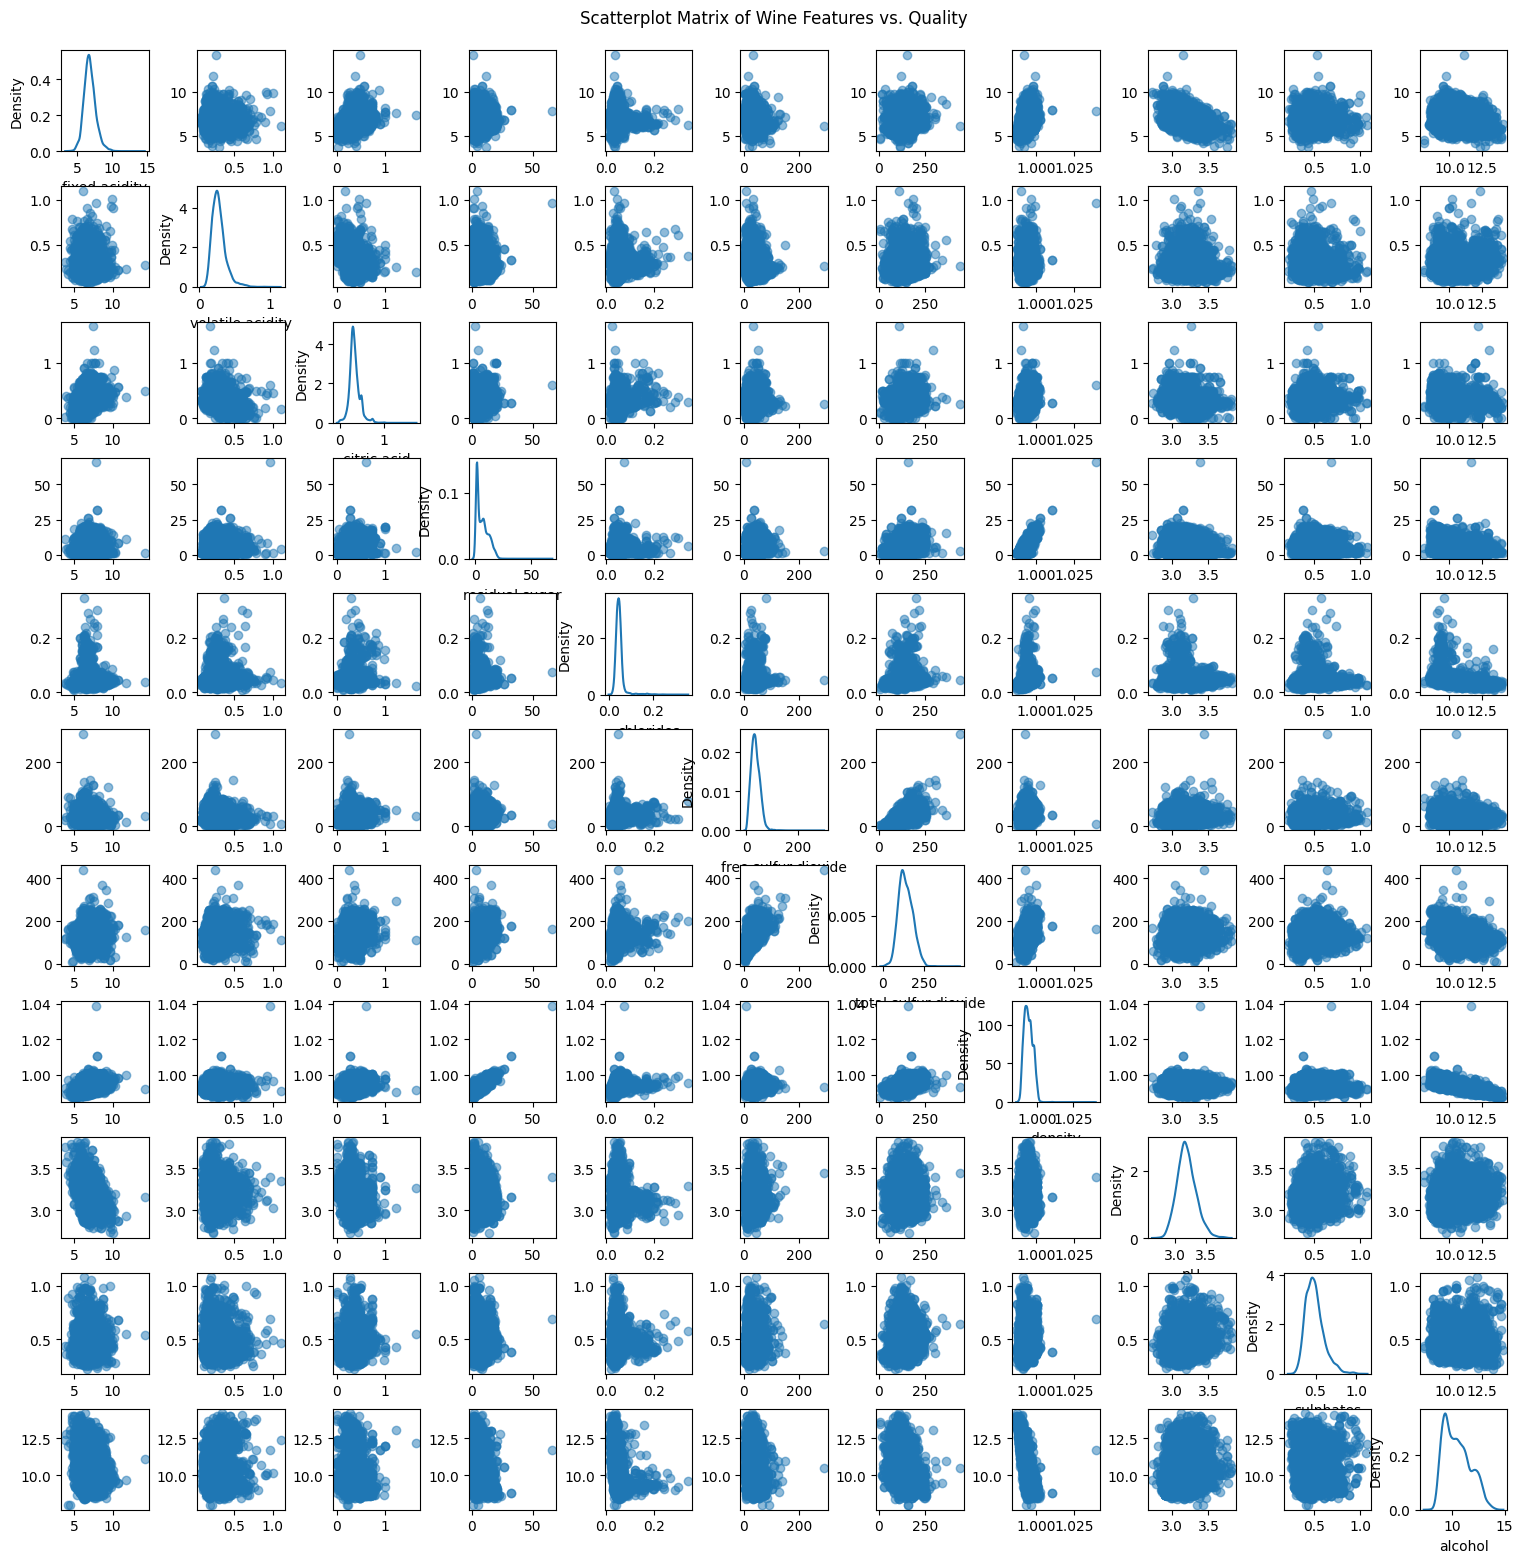

In [27]:
fig, axs = plt.subplots(11, 11, figsize=(15, 15))
fig.tight_layout(pad=0.4, h_pad=0.4, w_pad=0.4)

for i in range(11):
    for j in range(11):
        ax = axs[i, j]
        if i == j:
            sns.kdeplot(df.iloc[:, i], ax=ax)
        else:
            ax.scatter(df.iloc[:, j], df.iloc[:, i], alpha=0.5)

plt.suptitle('Scatterplot Matrix of Wine Features vs. Quality', y=1.02)
plt.show()

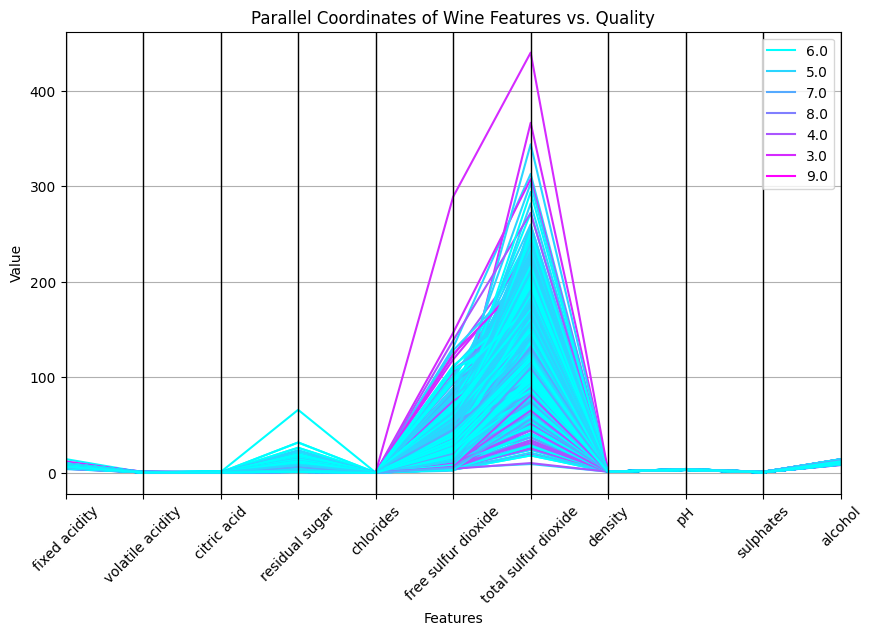

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Quality', colormap='cool', ax=ax)
ax.set_xticks(range(len(wine_feature_names)))
ax.set_xticklabels(wine_feature_names, rotation=45)
ax.set_xlabel('Features')
ax.set_ylabel('Value')
ax.set_title('Parallel Coordinates of Wine Features vs. Quality')

plt.show()